In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from utils import get_file_data, get_config, get_file_avg

In [48]:
file_path = '../output/idea1/'
files = sorted(os.listdir(file_path))
print(files)

['critical_prob=0.0&num_states=1&num_tasks=40&period=[10, 100]&task_max_utilization=0.1.txt', 'critical_prob=0.0&num_states=2&num_tasks=40&period=[10, 100]&task_max_utilization=0.1.txt', 'critical_prob=0.0&num_states=3&num_tasks=40&period=[10, 100]&task_max_utilization=0.1.txt', 'critical_prob=0.0&num_states=4&num_tasks=40&period=[10, 100]&task_max_utilization=0.1.txt', 'critical_prob=0.0&num_states=5&num_tasks=40&period=[10, 100]&task_max_utilization=0.1.txt', 'critical_prob=0.0&num_states=6&num_tasks=40&period=[10, 100]&task_max_utilization=0.1.txt', 'critical_prob=0.1&num_states=1&num_tasks=40&period=[10, 100]&task_max_utilization=0.1.txt', 'critical_prob=0.1&num_states=2&num_tasks=40&period=[10, 100]&task_max_utilization=0.1.txt', 'critical_prob=0.1&num_states=3&num_tasks=40&period=[10, 100]&task_max_utilization=0.1.txt', 'critical_prob=0.1&num_states=4&num_tasks=40&period=[10, 100]&task_max_utilization=0.1.txt', 'critical_prob=0.1&num_states=5&num_tasks=40&period=[10, 100]&task_ma

In [49]:
cfg = get_config('../cfg/state_exp_cfg.json')
state_less = {}
state_wise = {}

critical_prob_list = cfg['critical_prob_list']


for state_num in cfg['num_states_list'] :
    state_less[str(state_num)] = [ 0.0 ] * len(critical_prob_list)
    state_wise[str(state_num)] = [ 0.0 ] * len(critical_prob_list)

In [50]:
critical_prob_index = {str(p): i for i, p in enumerate(critical_prob_list)}

for file in files :
    if not file.endswith('.txt') :
        continue
    _params = [p.split('=') for p in file[:-4].split('&')]
    params = {k: v for k, v in _params}
    core_less, core_wise = get_file_avg(file_path + file)

    num_states = params['num_states']
    critical_prob = params['critical_prob']

    state_less[num_states][critical_prob_index[critical_prob]] += core_less
    state_wise[num_states][critical_prob_index[critical_prob]] += core_wise


In [51]:
print(state_less)
print(state_wise)

{'1': [4.394, 4.694, 4.908, 5.178, 5.48, 5.938, 6.42, 7.25, 8.176, 9.206, 9.984], '2': [4.394, 4.694, 4.908, 5.178, 5.48, 5.938, 6.42, 7.25, 8.176, 9.206, 9.984], '3': [4.394, 4.694, 4.908, 5.178, 5.48, 5.938, 6.42, 7.25, 8.176, 9.206, 9.984], '4': [4.394, 4.694, 4.908, 5.178, 5.48, 5.938, 6.42, 7.25, 8.176, 9.206, 9.984], '5': [4.394, 4.694, 4.908, 5.178, 5.48, 5.938, 6.42, 7.25, 8.176, 9.206, 9.984], '6': [4.394, 4.694, 4.908, 5.178, 5.48, 5.938, 6.42, 7.25, 8.176, 9.206, 9.984]}
{'1': [4.394, 4.694, 4.908, 5.178, 5.48, 5.938, 6.42, 7.25, 8.176, 9.206, 9.984], '2': [4.394, 4.638, 4.786, 5.0, 5.11, 5.392, 5.548, 5.802, 6.08, 6.546, 7.146], '3': [4.394, 4.622, 4.81, 4.962, 5.058, 5.328, 5.418, 5.67, 5.912, 6.142, 6.536], '4': [4.394, 4.642, 4.808, 4.968, 5.072, 5.314, 5.418, 5.636, 5.892, 6.112, 6.418], '5': [4.394, 4.654, 4.812, 4.976, 5.086, 5.34, 5.416, 5.64, 5.898, 6.11, 6.354], '6': [4.394, 4.652, 4.814, 4.982, 5.106, 5.344, 5.444, 5.68, 5.9, 6.11, 6.422]}


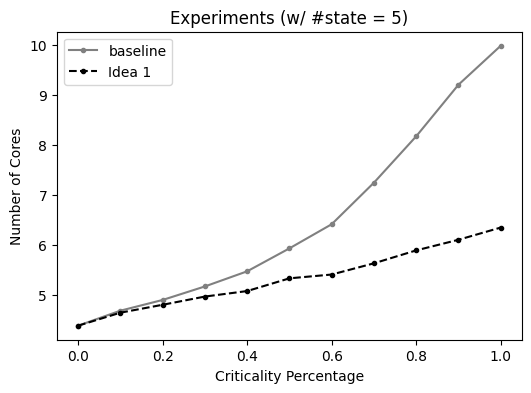

In [52]:
# Compare state-wise and state-less with criticality probability (#state = vis_state_num)

vis_state_num = '5'

plt.figure(figsize=(6,4))

ax = plt.gca()

# plt.plot(critical_prob_list, state_less[vis_state_num], label='state-less', color='gray')

# critical_prob_list.pop(9)
# state_wise[vis_state_num].pop(9)

# plt.plot(critical_prob_list, state_wise[vis_state_num], label='state-wise', color='black', linestyle='dashed')

plt.plot(critical_prob_list, state_less[vis_state_num], label='baseline', color='gray', marker='.')
plt.plot(critical_prob_list, state_wise[vis_state_num], label='Idea 1', color='black', linestyle='dashed', marker='.')

plt.title(f'Experiments (w/ #state = {vis_state_num})')
plt.xlabel('Criticality Percentage')
plt.ylabel('Number of Cores')
plt.legend()

# ax.set_ylim([3, 9])
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.show()

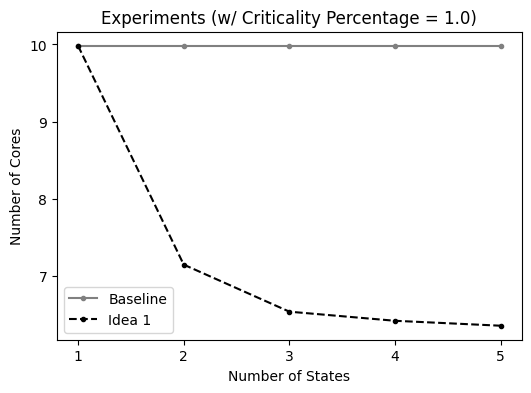

In [54]:
# Compare state-wise and state-less with #states (#critical_prob = vis_critical_prob)

vis_critical_prob = '1.0'

plt.figure(figsize=(6,4))

ax = plt.gca()

index = critical_prob_index[vis_critical_prob]
state_list = cfg['num_states_list']
state_list = cfg['num_states_list']

def get_state_list(output_dict, index) :
    return [output_dict[str(s)][index] for s in state_list]

plt.plot(state_list[:-1], get_state_list(state_less, index)[:-1], label='Baseline', color='gray', marker='.')
plt.plot(state_list[:-1], get_state_list(state_wise, index)[:-1], label='Idea 1', color='black', linestyle='dashed', marker='.')

plt.title(f'Experiments (w/ Criticality Percentage = {vis_critical_prob})') 
plt.xlabel('Number of States')
plt.ylabel('Number of Cores')
plt.legend()

# ax.set_ylim([4, 8])
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
# ax.yaxis.set_major_locator(plt.AutoLocator())
# ax.yaxis.set_major_locator(plt.IndexLocator(base=1, offset=0))

plt.show()